In [323]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
plt.style.use('bmh')

import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Ridge, Lasso
import itertools
plt.style.use('ggplot')

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

In [324]:
features = pd.read_csv('DengueProject/dengue_features_train.csv')
labels = pd.read_csv('DengueProject/dengue_labels_train.csv')

features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [325]:
features['total_cases'] = labels['total_cases']
# Seperate data for San Juan

sjf = features[features['city']=='sj']
iqf = features[features['city']=='iq']



##sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
##iq_train_labels = train_labels.loc['iq']

In [326]:
sjf.fillna(method='ffill', inplace=True)
iqf.fillna(method='ffill', inplace=True)
sjf.set_index('week_start_date', drop = True, inplace = True)
iqf.set_index('week_start_date', drop = True, inplace = True)

In [327]:
sjf.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Text(0.5,1,'SJ Variable Correlations')

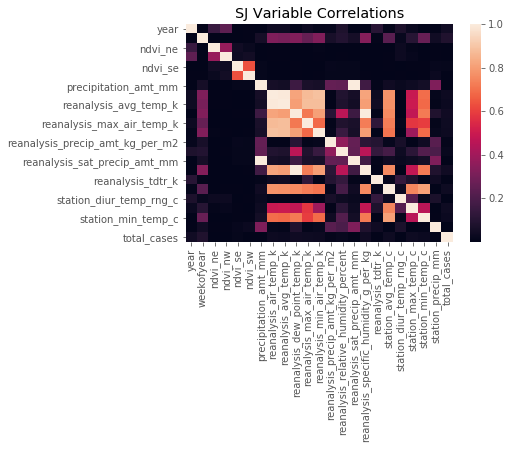

In [328]:
sjCor = sjf.corr()**2
sns.heatmap(sjCor)
plt.title('SJ Variable Correlations')
##sj_correlations = sj_train_features.corr()
##iq_correlations = iq_train_features.corr()

Text(0.5,1,'IQ Variable Correlations')

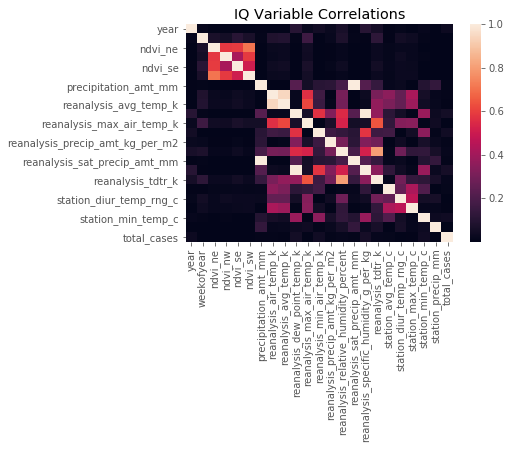

In [329]:
##sj_corr_heat = sns.heatmap(sj_correlations**2)
iqCor = iqf.corr()**2
sns.heatmap(iqCor)
plt.title('IQ Variable Correlations')

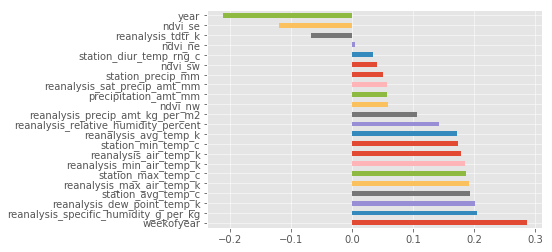

In [330]:
# San Juan
(sjf.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

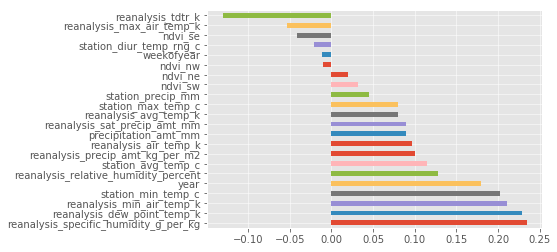

In [331]:
(iqf.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [332]:
from sklearn.preprocessing import StandardScaler

In [333]:
ss = StandardScaler()
Xs = ss.fit_transform(sjf[sjf.columns[7:23]])
df_sj_s = pd.DataFrame(Xs, columns = sjf.columns[7:23], index=sjf.index)

df_sj_s['weekofyear'] = sjf['weekofyear']
df_sj_s['total_cases'] = sjf['total_cases']


#Standardize IQ
ss = StandardScaler()
Xs = ss.fit_transform(iqf[iqf.columns[7:23]])
df_iq_s = pd.DataFrame(Xs, columns = iqf.columns[7:23], index=iqf.index)
df_iq_s['weekofyear'] = iqf['weekofyear']

df_sj_s.head()

,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,weekofyear,total_cases
week_start_date,,,,,,,,,,,,,,,,,,
1990-04-30,-0.513013,-1.282015,-1.253898,-1.714497,-1.265623,-1.079864,0.045021,-1.538475,-0.513013,-1.624972,0.228762,-1.100409,0.173508,-1.278687,-1.723054,-0.367775,18,4
1990-05-07,-0.279993,-0.765638,-0.679726,-0.734948,-0.391773,-0.693609,-0.350886,-0.355236,-0.279993,-0.753081,-0.287676,-0.201443,-0.459811,0.059942,-0.261722,-0.620780,19,5
1990-05-14,-0.017398,-0.304710,-0.322333,0.210006,-0.709537,0.001651,-0.121114,1.029432,-0.017398,0.192993,-0.431131,-0.201443,-0.322877,0.350949,0.136822,0.500648,20,4
1990-05-21,-0.447140,-0.138360,-0.035247,0.130805,0.005432,-0.230103,-0.464646,0.522269,-0.447140,0.080343,-0.172912,0.333897,0.019457,0.991163,0.468943,-0.778054,21,3
1990-05-28,-0.622801,0.291378,0.322146,0.456714,0.402637,0.156153,-0.512515,0.558586,-0.622801,0.424704,1.003419,1.374273,3.134700,1.980584,0.867488,-0.716512,22,6


Text(0.5,0,'Week of Year')

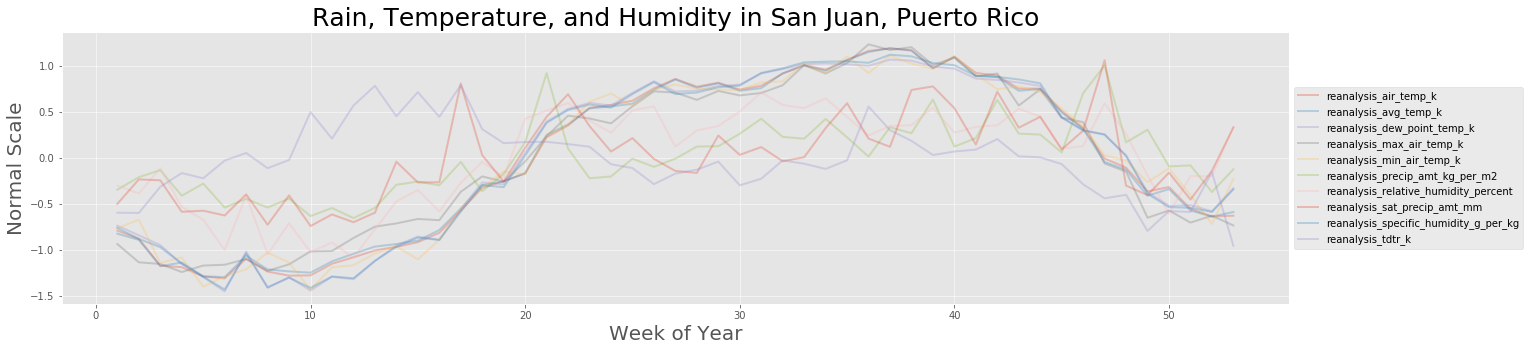

In [334]:
for i in (df_sj_s.columns[1:11]):
    df_sj_s.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (22, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('Rain, Temperature, and Humidity in San Juan, Puerto Rico', size = 25)
plt.ylabel('Normal Scale', size = 20)
plt.xlabel('Week of Year', size = 20)

Text(0.5,0,'Week of Year')

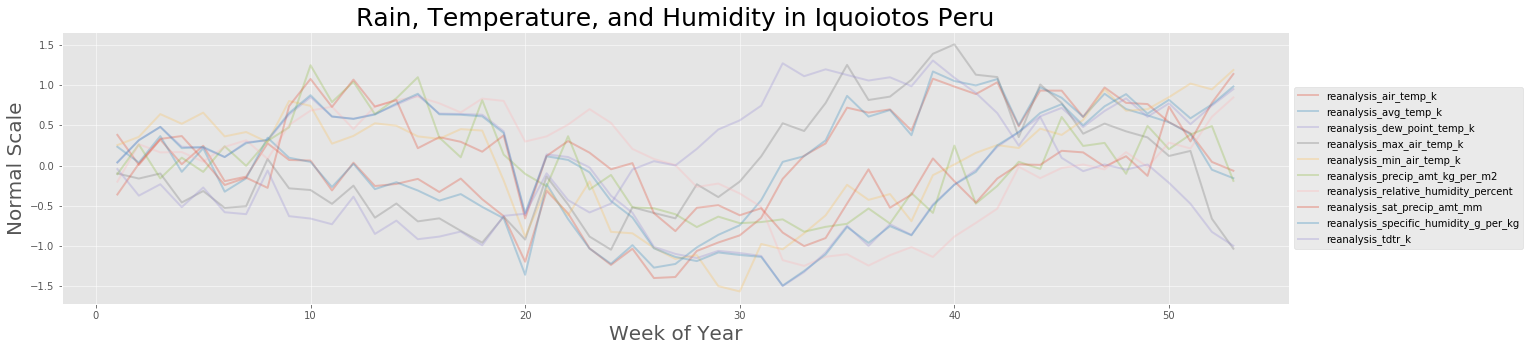

In [335]:
for i in (df_iq_s.columns[1:11]):
    df_iq_s.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (22, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('Rain, Temperature, and Humidity in Iquoiotos Peru', size = 25)
plt.ylabel('Normal Scale', size = 20)
plt.xlabel('Week of Year', size = 20)

Text(0,0.5,'Number of Cases')

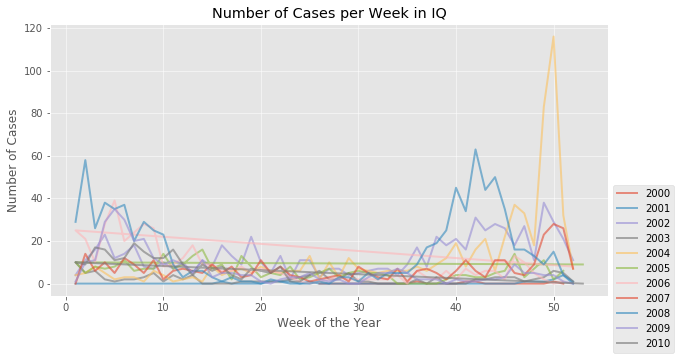

In [336]:
target_sj = labels[labels['city'] == 'sj']
target_iq = labels[labels['city'] == 'iq']

fig,ax = plt.subplots(figsize=(10,5))
for i in set(target_iq['year']):
    df = target_iq[target_iq['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .6)
    
plt.legend(set(target_iq['year']), loc='center left', bbox_to_anchor=(1, .1))

plt.title('Number of Cases per Week in IQ')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

Text(0,0.5,'Number of Cases')

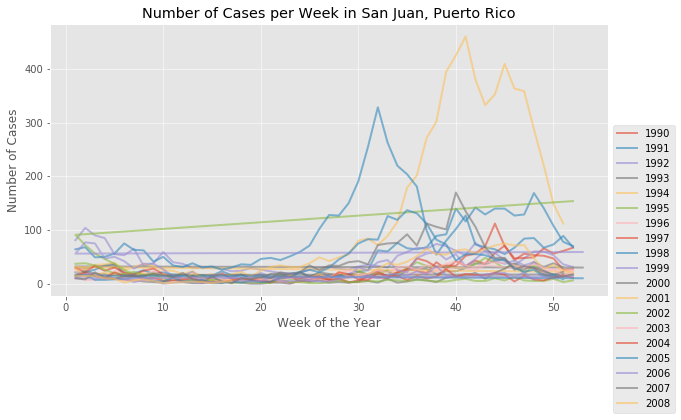

In [205]:
target_sj = labels[labels['city'] == 'sj']
target_iq = labels[labels['city'] == 'iq']


fig,ax = plt.subplots(figsize=(10,5))
for i in set(target_sj['year']):
    df = target_sj[target_sj['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .6)
    
plt.legend(set(target_sj['year']), loc='center left', bbox_to_anchor=(1, .1))

plt.title('Number of Cases per Week in San Juan, Puerto Rico')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')


Text(0,0.5,'Number of Cases')

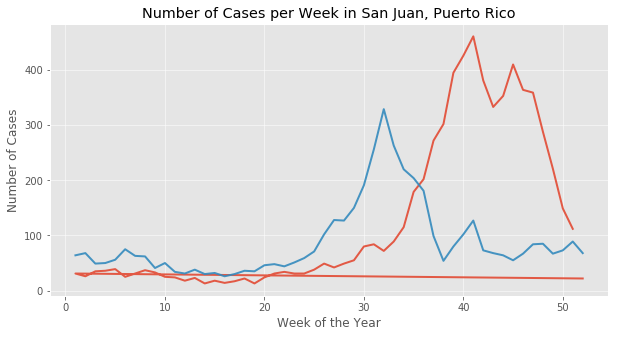

In [383]:
fig,ax = plt.subplots(figsize=(10,5))
for i in set(target_sj['year']):
    if (i== 1994):
        df = target_sj[target_sj['year'] == i]
        df.set_index('weekofyear', drop = True, inplace = True)
        plt.plot(df['total_cases'], alpha = .9)
    if (i== 1998):
        df = target_sj[target_sj['year'] == i]
        df.set_index('weekofyear', drop = True, inplace = True)
        plt.plot(df['total_cases'], alpha = .9)
    

plt.title('Number of Cases per Week in San Juan, Puerto Rico')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

Text(0,0.5,'Number of Cases')

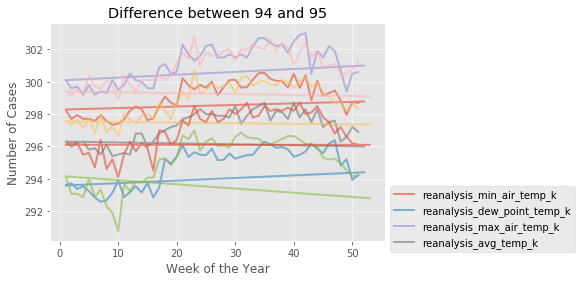

In [344]:


df = sjf[sjf['year'] == 1994]
df.set_index('weekofyear', drop = True, inplace = True)
plt.plot(df[['reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']], alpha = .6)
    
plt.legend(set(df[['reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]), loc='center left', bbox_to_anchor=(1, .1))



df = sjf[sjf['year'] == 1993]
df.set_index('weekofyear', drop = True, inplace = True)
plt.plot(df[['reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']], alpha = .6)
    
plt.legend(set(df[['reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]), loc='center left', bbox_to_anchor=(1, .1))

plt.title('Difference between 94 and 95 temp SJ' )
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')
#difference between 1994 and 1995


Text(0,0.5,'Number of Cases')

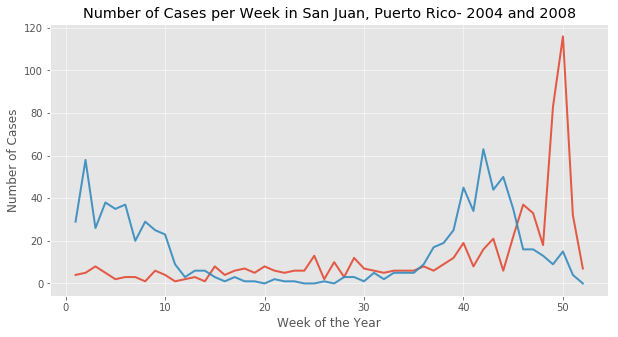

In [349]:
fig,ax = plt.subplots(figsize=(10,5))
for i in set(target_iq['year']):
    if (i== 2004):
        df = target_iq[target_iq['year'] == i]
        df.set_index('weekofyear', drop = True, inplace = True)
        plt.plot(df['total_cases'], alpha = .9)
    if (i== 2008):
        df = target_iq[target_iq['year'] == i]
        df.set_index('weekofyear', drop = True, inplace = True)
        plt.plot(df['total_cases'], alpha = .9)
    

plt.title('Number of Cases per Week in San Juan, Puerto Rico- 2004 and 2008')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

#rain 94 vs 95

Text(0,0.5,'Number of Cases')

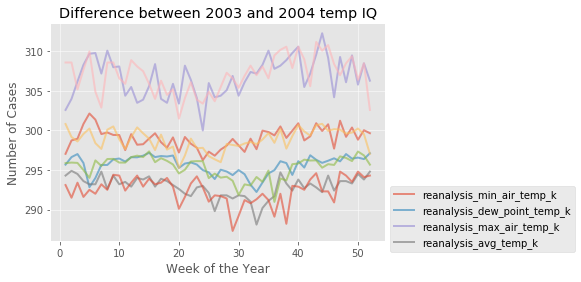

In [370]:
df = iqf[iqf['year'] == 2004]
df.set_index('weekofyear', drop = True, inplace = True)
plt.plot(df[['reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']], alpha = .6)
    
plt.legend(set(df[['reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]), loc='center left', bbox_to_anchor=(1, .1))



df = iqf[iqf['year'] == 2003]
df.set_index('weekofyear', drop = True, inplace = True)
plt.plot(df[['reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']], alpha = .6)
    
plt.legend(set(df[['reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]), loc='center left', bbox_to_anchor=(1, .1))

plt.title('Difference between 2003 and 2004 temp IQ' )
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

Text(0,0.5,'Number of Cases')

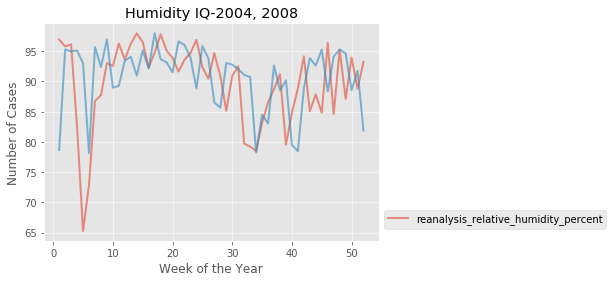

In [407]:
df = iqf[iqf['year'] == 2004]
df.set_index('weekofyear', drop = True, inplace = True)
plt.plot(df['reanalysis_relative_humidity_percent'], alpha = .6)
    
plt.legend(set(df[['reanalysis_relative_humidity_percent']]), loc='center left', bbox_to_anchor=(1, .1))


df = iqf[iqf['year'] == 2008]
df.set_index('weekofyear', drop = True, inplace = True)
plt.plot(df['reanalysis_relative_humidity_percent'], alpha = .6)
    


plt.title('Humidity IQ-2004, 2008' )
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')


#humidity MIGHT BE A FACTOR HERE same shit in 2008 as 2004

Text(0,0.5,'Number of Cases')

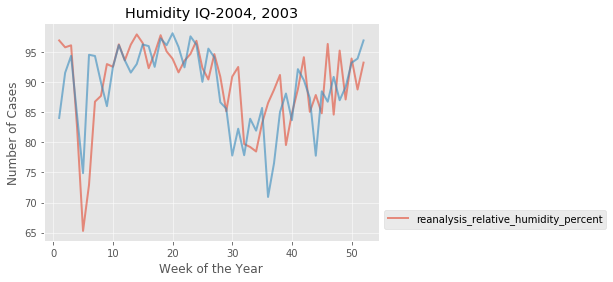

In [412]:
df = iqf[iqf['year'] == 2004]
df.set_index('weekofyear', drop = True, inplace = True)
plt.plot(df['reanalysis_relative_humidity_percent'], alpha = .6)
    
plt.legend(set(df[['reanalysis_relative_humidity_percent']]), loc='center left', bbox_to_anchor=(1, .1))


df = iqf[iqf['year'] == 2003]
df.set_index('weekofyear', drop = True, inplace = True)
plt.plot(df['reanalysis_relative_humidity_percent'], alpha = .6)
    


plt.title('Humidity IQ-2004, 2003' )
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')